In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import tracemalloc
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates,
    MOMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger



Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": False,
	"inferring": True,
	"site": "MS", # values: MT, PA, MS, PI
	"training_date": "earlier", # values: earlier, current
	"mode": "ensemble", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": False,
	"learning_rate": 1e-4,
    "use_cloud_mask": False,
    "mask_out_non_biome": False
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
		# dates = [2019, 2020]

	else:
		dates = [2019, 2020]
		# dates = [2020, 2021]

	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
		# dates = [2017, 2018]

	else:
		dates = [2019, 2020]
		# dates = [2018, 2019]

	datasetClass = PIMultipleDates
	config['mask_out_non_biome'] = True
elif config['site'] == 'MO':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MOMultipleDates

else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			exp = 1; repetition_id = 7
			exp = 20; repetition_id = 0
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			# exp = 5; repetition_id = 0		
			# exp = 24; repetition_id = 0	
			exp = 30; repetition_id = 0	# L1C
	elif type(dataset) == PIMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			exp = 7; repetition_id = 0	
			## exp = 18; repetition_id = 0	
			exp = 27; repetition_id = 0
			exp = 28; repetition_id = 0 # L1C
	elif type(dataset) == MOMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			exp = 7; repetition_id = 0	
			exp = 19; repetition_id = 0	

else:

	exp = 30
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': False, 'inferring': True, 'site': 'MS', 'training_date': 'earlier', 'mode': 'ensemble', 'uncertainty_method': 'pred_entropy', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': False, 'learning_rate': 0.0001, 'use_cloud_mask': False, 'mask_out_non_biome': False, 'inference_times': 10, 'training_times': 10}


ic| dataset.py:470 in __init__()- list(self.date_ids): [0]
ic| dataset.py:491 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 9
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]


In [8]:
'''
import src.Logger as lg
importlib.reload(lg)
logger = Logger()
manager.logger = logger
'''

'\nimport src.Logger as lg\nimportlib.reload(lg)\nlogger = Logger()\nmanager.logger = logger\n'

In [9]:
dates

[2019, 2020]

In [10]:
manager.config

{'training': False,
 'inferring': True,
 'site': 'MS',
 'training_date': 'earlier',
 'mode': 'ensemble',
 'uncertainty_method': 'pred_entropy',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': False,
 'learning_rate': 0.0001,
 'use_cloud_mask': False,
 'mask_out_non_biome': False,
 'inference_times': 10,
 'training_times': 10,
 'dropout_training': False}

In [11]:
exp

30

In [12]:
manager.setExperimentPath()
manager.createLogFolders()

In [13]:
# ic(type(dataset), exp, dataset.dates)


In [14]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/MS/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:568 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| dataset.py:571 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:575 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MS/deforestation_before_2000_MS.tif


ic| dataset.py:579 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([126708038, 235735967], dtype=int64))
ic| dataset.py:581 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))
ic| dataset.py:560 in loadLabel()
    label_per_date.shape: (18605, 19481, 1)


Removing bufer................
Mask label shape:  
 (18605, 19481, 1) 
 Unique values:  
 [0 1 2]


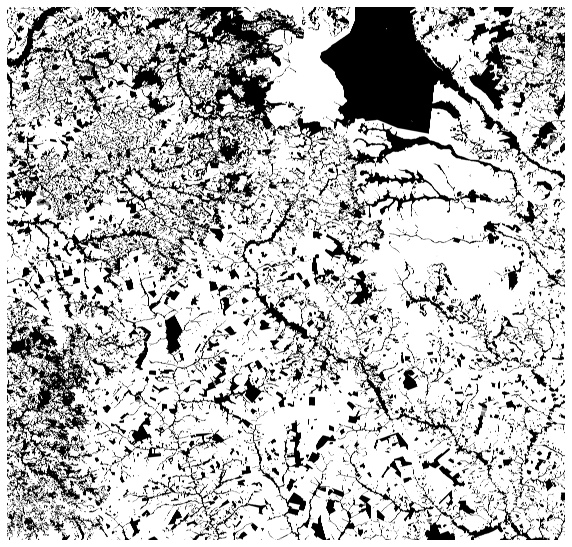

In [15]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [16]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3721 3896
Mask size:  (18605, 19480)


In [17]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [18]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([4870897,  107548, 9518571], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([5863739,   42735, 8590542], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([5043217,     380, 9453419], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([11586786,      524,  2909706], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([5102453,    8953, 9385610], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([ 4079965,    73003, 10344048], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([4678683,   19973, 9798360], dtype=int64))
Set 8 (array([0, 1, 2], dtype=uint8), array([ 3810754,    20163, 10666099], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([ 4360787,     7117, 10129112], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([ 2962032,    40216, 11494768], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([ 3461781,    13658, 11021577], dtype=int64))
Set 12 (array([0, 1, 2]

In [19]:

manager.label_mask.dtype

dtype('uint8')

In [20]:

manager.getLabelCurrentDeforestation()

In [21]:

manager.loadInputImage()

ic| dataset.py:511 in loadInputImage()
    image_stack.shape: (18605, 19481, 9)


Image shape:  (18605, 19481, 9)
mask:  (18605, 19480)
image stack:  (18605, 19480, 9)
ref : (18605, 19480, 1)


In [22]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.05263158, 0.10526316, 0.15789473, 0.21052632,
        0.2631579 , 0.31578946, 0.36842105, 0.42105263, 0.5263158 ,
        0.6315789 , 0.7368421 , 0.84210527, 0.94736844, 1.        ],
       dtype=float32),
 array([ 99662188,    560438,    316161,    440417,    310884,    701575,
           318766,    903906,   1003651,   1305903,   2096238,   3824633,
          6540581,   8716969, 235723090], dtype=int64))

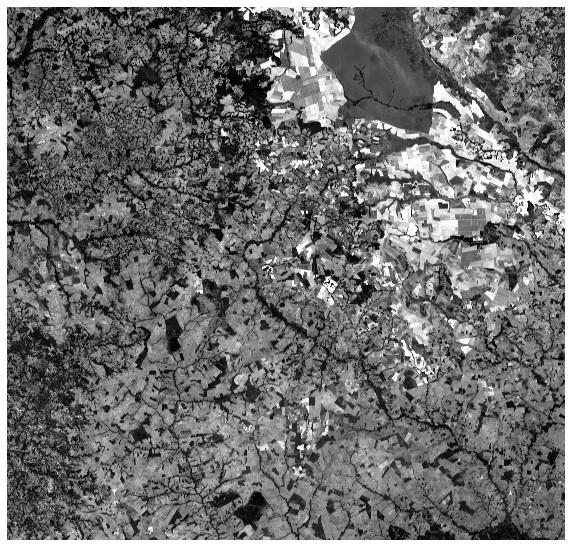

In [23]:

manager.logger.plotFigure(manager.image_stack[...,1], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

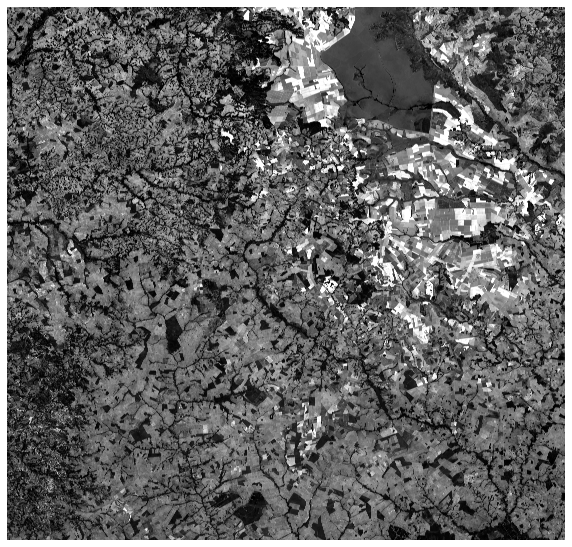

In [24]:

manager.logger.plotFigure(manager.image_stack[...,5], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [25]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([ 99008239,    506597, 262910564], dtype=int64))

In [26]:
# manager.maskNoDataAsNotConsideredClass()

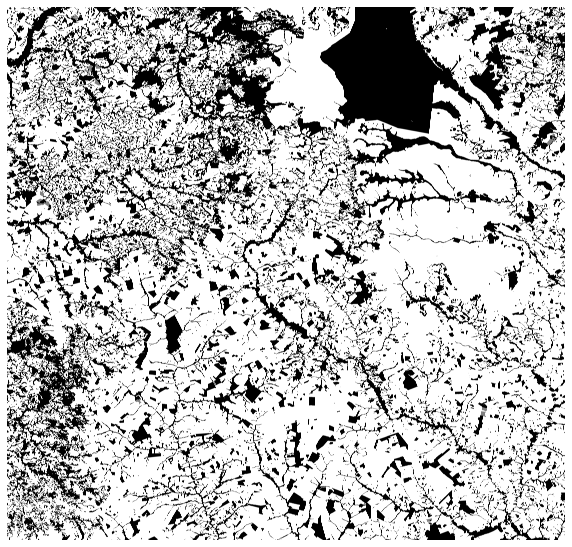

In [27]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [28]:

manager.getImageChannels()

ic| base.py:111 in getImageChannels()
    self.image_stack.shape: (18605, 19480, 9)
ic| base.py:113 in getImageChannels()- self.channels: 9


In [29]:

manager.getTrainValTestMasks()

Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]


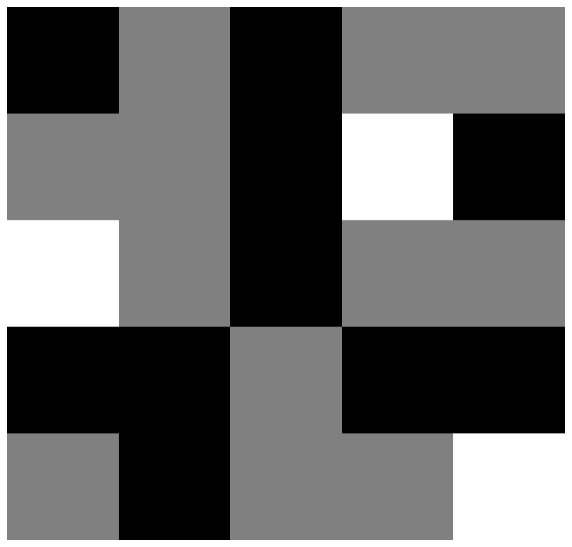

In [30]:
manager.logger.plotFigure(manager.mask_tr_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [31]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [32]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([ 51670884,    190363, 122102945], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([10755724,    20775, 32714549], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([ 36581631,    295459, 108093070], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([ 99008239,    506597, 262910564], dtype=int64))


In [33]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 4))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 4))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 4))

train unique percentage [0.297  0.0011 0.7019]
val unique [2.473e-01 5.000e-04 7.522e-01]
test unique [0.2523 0.002  0.7456]


In [34]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


In [35]:
if config["training"] == True:
    manager.extractCoords()

In [36]:
if config["training"] == True:
    manager.trainTestSplit()

In [37]:
if config["training"] == True:
    manager.label_mask.shape

In [38]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [39]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [40]:
if config["training"] == True:
    print(manager.coords_train)

In [41]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

In [42]:
if config["training"] == True:
    inputSnipShow = True

In [43]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [44]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [45]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [46]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8]]

In [47]:
manager.dataset.bands

4

In [48]:
manager.dataset.previewBandsSnip

[[1, 2, 3], [5, 6, 7]]

In [49]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


In [50]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


In [51]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

In [52]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [53]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [54]:
if config["training"] == True:
    manager.getGenerators()


In [55]:
if config["training"] == True:
    manager.fixChannelNumber()

In [56]:
if config["training"] == True:
    print(manager.path_exp)

In [57]:
if config["training"] == True:
    print(manager.channels)

In [58]:
if config["training"] == True:
    print(manager.image_stack.shape)

In [59]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

In [60]:
manager.class_n

3

In [61]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

In [62]:
if config["training"] == True:
    manager.plotHistory()


In [63]:
repetition_id = 0

In [64]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [65]:
manager.image_stack.shape

(18605, 19480, 9)

In [66]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [67]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [68]:
manager.image_stack.shape

(18605, 19480, 9)

In [69]:
manager.setPadding()

-35.0 -8.0


In [70]:
import src.network as network
from tensorflow.keras.models import Model, load_model, Sequential
'''
def infer(self):

    self.h, self.w, self.c = self.image1_pad.shape
    self.c = self.channels
    patch_size_rows = self.h//self.n_rows
    patch_size_cols = self.w//self.n_cols
    num_patches_x = int(self.h/patch_size_rows)
    num_patches_y = int(self.w/patch_size_cols)

    ic(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5')
    model = load_model(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5', compile=False)
    
    if self.classes_mode == False:
        class_n = 3
        self.patchesHandler.class_n = class_n
    else:
        class_n = 2    
        self.patchesHandler.class_n = class_n + 1
    if self.config["loadInference"] == False:
        if self.config["save_probabilities"] == False:
            if self.classes_mode == False:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)
            else:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)

            # self.prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)
        print("Dropout training mode: {}".format(self.config['dropout_training']))
        new_model = network.build_resunet_dropout_spatial(input_shape=(patch_size_rows,patch_size_cols, self.c), 
            nb_filters = self.nb_filters, n_classes = class_n, dropout_seed = None, training=self.config['dropout_training'])

        for l in range(1, len(model.layers)):
            new_model.layers[l].set_weights(model.layers[l].get_weights())
        
        

        metrics_all =[]
        with tf.device('/cpu:0'):
            for tm in range(0,self.config["inference_times"]):

                print('time: ', tm)

                
                # Recinstructing predicted map
                start_test = time.time()
                
                prob_reconstructed = self.patchesHandler.infer(
                        new_model, self.image1_pad, self.h, self.w, 
                        num_patches_x, num_patches_y, patch_size_rows, 
                        patch_size_cols, classes_mode = self.classes_mode)
                        
                ts_time =  time.time() - start_test

                if self.config["save_probabilities"] == True:
                    np.save(self.path_maps+'/'+'prob_'+str(tm)+'.npy',prob_reconstructed) 
                else:
                    self.prob_rec[...,tm] = prob_reconstructed
                
                metrics_all.append(ts_time)
                del prob_reconstructed
            metrics_ = np.asarray(metrics_all)
            # Saving test time
            np.save(self.path_exp+'/metrics_ts.npy', metrics_)
    del self.image1_pad
'''

'\ndef infer(self):\n\n    self.h, self.w, self.c = self.image1_pad.shape\n    self.c = self.channels\n    patch_size_rows = self.h//self.n_rows\n    patch_size_cols = self.w//self.n_cols\n    num_patches_x = int(self.h/patch_size_rows)\n    num_patches_y = int(self.w/patch_size_cols)\n\n    ic(self.path_models+ \'/\' + self.method +\'_\'+str(self.repetition_id)+\'.h5\')\n    model = load_model(self.path_models+ \'/\' + self.method +\'_\'+str(self.repetition_id)+\'.h5\', compile=False)\n    \n    if self.classes_mode == False:\n        class_n = 3\n        self.patchesHandler.class_n = class_n\n    else:\n        class_n = 2    \n        self.patchesHandler.class_n = class_n + 1\n    if self.config["loadInference"] == False:\n        if self.config["save_probabilities"] == False:\n            if self.classes_mode == False:\n                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)\n            else:

In [71]:
'''
import types

manager.infer = types.MethodType(infer, manager)
'''


'\nimport types\n\nmanager.infer = types.MethodType(infer, manager)\n'

In [72]:
manager.infer()

time:  0
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_0.h5
runtime_repetition 133.85
time:  1
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_1.h5
runtime_repetition 133.48
time:  2
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_2.h5
runtime_repetition 140.97
time:  3
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_3.h5
runtime_repetition 145.39
time:  4
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_4.h5
runtime_repetition 144.41
time:  5
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_5.h5
runtime_repetition 140.81
time:  6
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_6.h5
runtime_repetition 140.02
time:  7
Loading model in: D:/Jorge/datasets/deforestation/experiments/MS/exp30/models/resunet_7.h5
runtime_repetition

In [73]:
manager.loadPredictedProbabilities()

In [74]:
manager.prob_rec.shape

(18640, 19488, 10)

In [75]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [76]:
manager.prob_rec.shape

(18640, 19488, 10)

In [77]:
manager.getMeanProb()

In [78]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:121 in getStats()
    np.min(value): 1.9820935e-11
    np.mean(value): 0.0057353023
    np.max(value): 1.0


In [79]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <cell line: 1>()
    manager.mean_prob.shape: (18640, 19488)


(18640, 19488)

In [80]:
manager.unpadMeanProb()

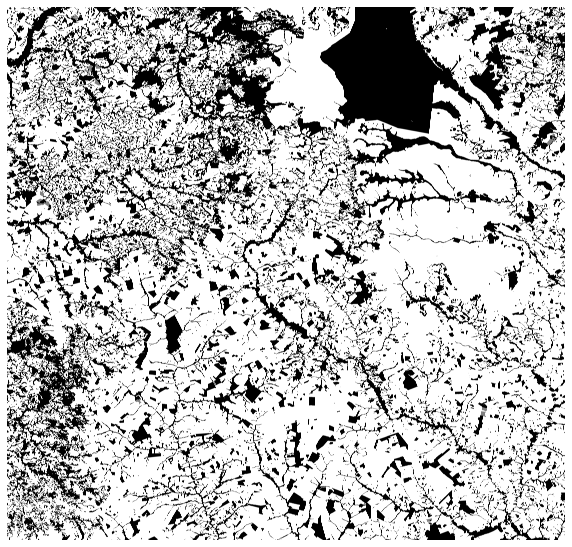

In [81]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [82]:
manager.squeezeLabel()

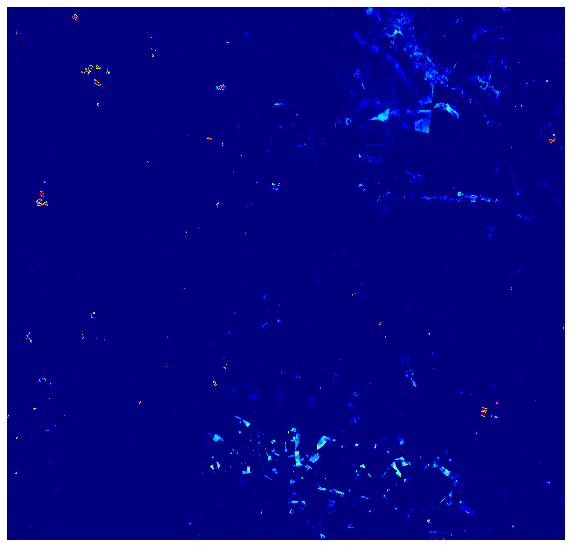

In [83]:
manager.setMeanProbNotConsideredAreas()
manager.logger.plotFigure(manager.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [84]:
print(manager.label_mask.shape)

(18605, 19480)


In [85]:
# manager.getLabelTest()

In [86]:
# manager.getMAP()

In [87]:
manager.prob_rec.shape

(18640, 19488, 10)

In [88]:
manager.preprocessProbRec()
print(manager.prob_rec.shape)

(10, 18640, 19488, 1)


In [89]:
manager.prob_rec.shape

(10, 18640, 19488, 1)

In [90]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:121 in getStats()
    np.min(value): 6.902197e-21
    np.mean(value): 0.005730737
    np.max(value): 1.0


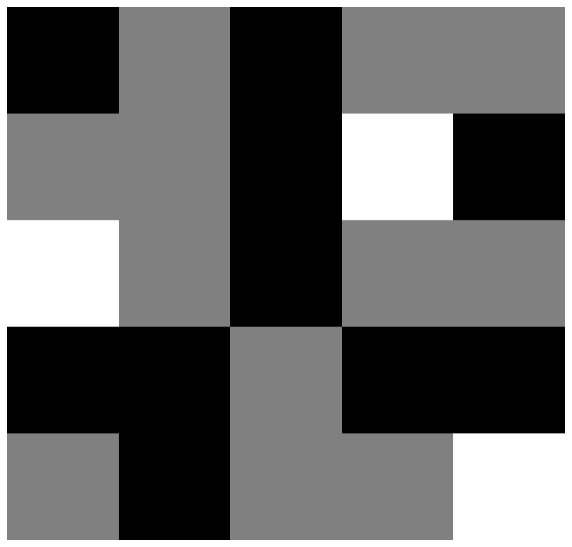

In [91]:
manager.logger.plotFigure(manager.mask_tr_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [92]:
manager.getLabelCurrentDeforestation()

In [93]:
manager.applyProbabilityThreshold()

(18605, 19480)
(array([0., 1.], dtype=float32), array([361905095,    520305], dtype=int64))


ic| base.py:413 in applyProbabilityThreshold()
    self.predicted_unpad.shape: (18605, 19480)
    self.predicted.shape: (18605, 19480)


In [94]:
manager.getTestValues()

ic| base.py:436 in getTestValues()- predicted_test.shape: (144970160,)
ic| base.py:445 in getTestValues()- predicted_test.shape: (36877090,)


In [95]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([361905095,    520305], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([361936481,    488919], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([362394014,     31386], dtype=int64))


In [96]:
manager.calculateMetrics()

ic| base.py:489 in calculateMetrics()
    self.f1: 84.93
    self.precision: 92.94
    self.recall: 78.19


In [97]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| base.py:418 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (43491048,)
ic| base.py:424 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (10773961,)
ic| base.py:500 in calculateMetricsValidation()
    f1_val: 54.52
    precision_val: 93.98
    recall_val: 38.4
    mAP_val: 43.37


In [98]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [99]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/MS/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:568 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| dataset.py:571 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:575 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MS/deforestation_before_2000_MS.tif


ic| dataset.py:579 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([126708038, 235735967], dtype=int64))
ic| dataset.py:581 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))
ic| dataset.py:560 in loadLabel()
    label_per_date.shape: (18605, 19481, 1)


In [100]:
manager.getErrorMask()

(array([0., 1.], dtype=float32), array([362169704,    255696], dtype=int64))


In [101]:
manager.getErrorMaskToShowRGB()

[0. 1.]


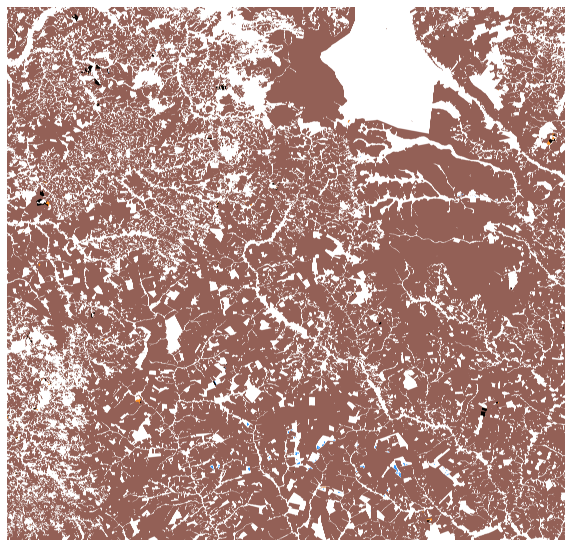

In [102]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [103]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [104]:
manager.config['uncertainty_method']

'pred_entropy'

In [105]:
manager.config['uncertainty_method'] = "pred_entropy"

In [106]:
print(np.min(manager.prob_rec), np.mean(manager.prob_rec), np.max(manager.prob_rec))
print(np.std(manager.prob_rec))
print(manager.prob_rec.shape)

6.902197e-21 0.005730737 1.0
0.05879365
(10, 18640, 19488, 1)


In [107]:
manager.setUncertainty()

pred_mean 1.9820935e-11 0.0057353023 1.0
K = 1, pred_mean shape (18640, 19488, 1)


In [108]:
# manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [109]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:121 in getStats()
    np.min(value): -0.0
    np.mean(value): 0.0092469435
    np.max(value): 0.36787948


In [110]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:121 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.009002936
    np.max(value): 0.36787948


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (18605, 19480)


(18605, 19480)

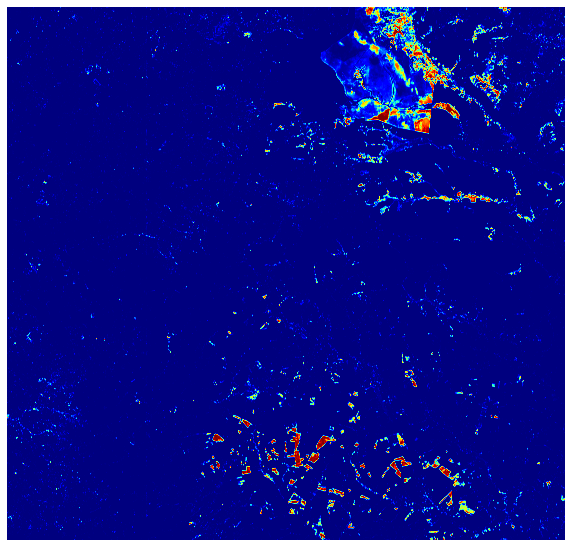

In [111]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



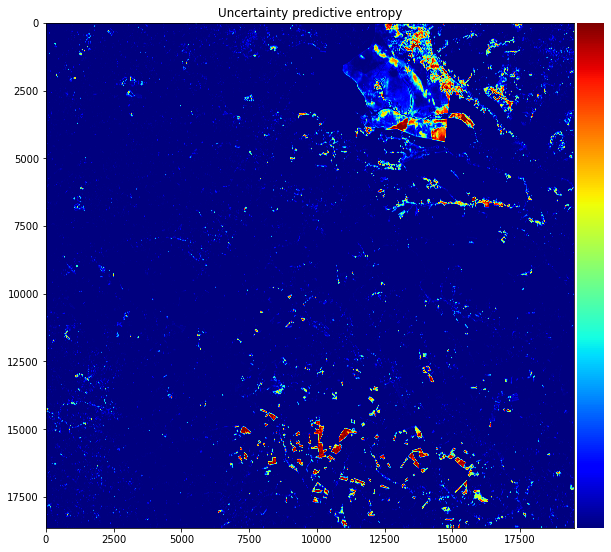

In [112]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

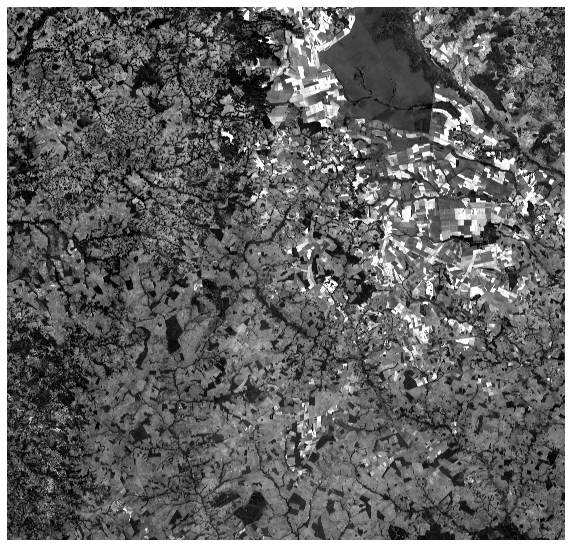

In [113]:

manager.logger.plotFigure(manager.image_stack[...,7], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [114]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:540 in getTestValues2()
    self.label_mask.shape: (18605, 19480)
ic| base.py:541 in getTestValues2()
    self.mask_amazon_ts.shape: (18605, 19480)
ic| base.py:545 in getTestValues2()
    self.label_mask_test.shape: (144970160,)
ic| base.py:553 in getTestValues2()
    self.error_mask_test.shape: (36863450,)


In [115]:
manager.dataset.previewLims1 = np.array([ 5500,  8500, 10000, 12500])

ic| Logger.py:165 in plotCropSample()
    manager.dataset.previewLims1: array([ 5500,  8500, 10000, 12500])
    manager.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| Logger.py:167 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([0, 1], dtype=uint8)
ic| Logger.py:169 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


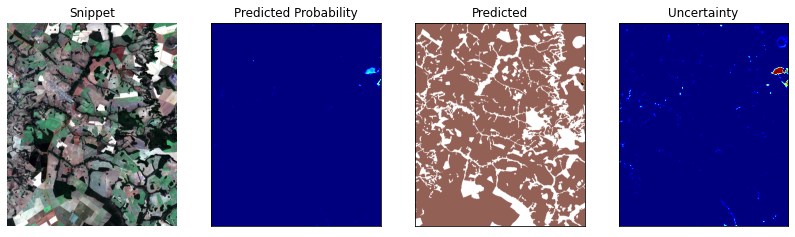

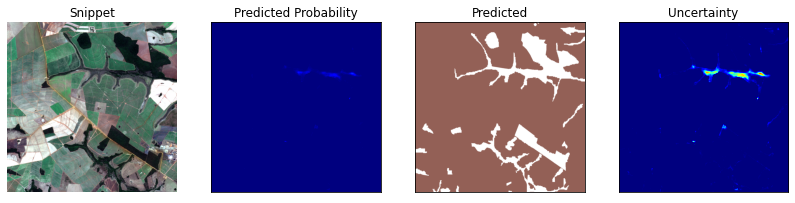

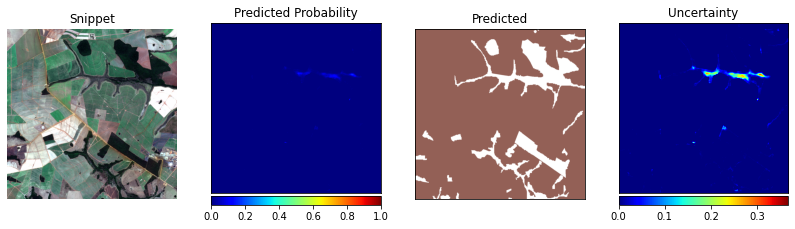

In [116]:
manager.logger.plotCropSample(manager)

In [117]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [118]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [119]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

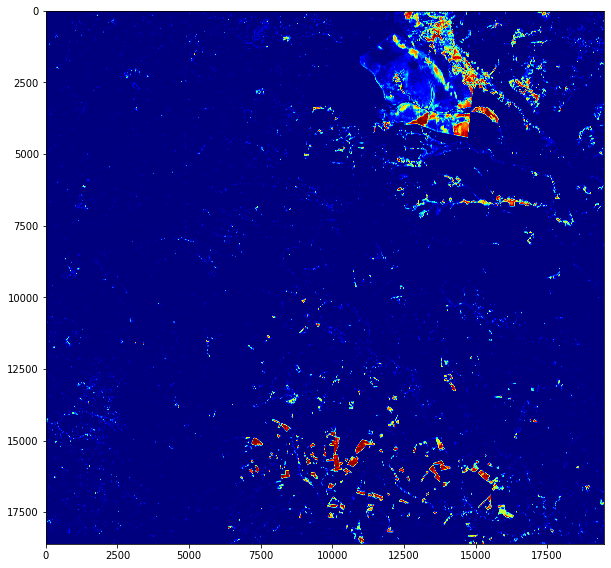

In [120]:
plt.figure(figsize=(10, 10))
plt.imshow(manager.uncertainty_to_show, cmap = 'jet')


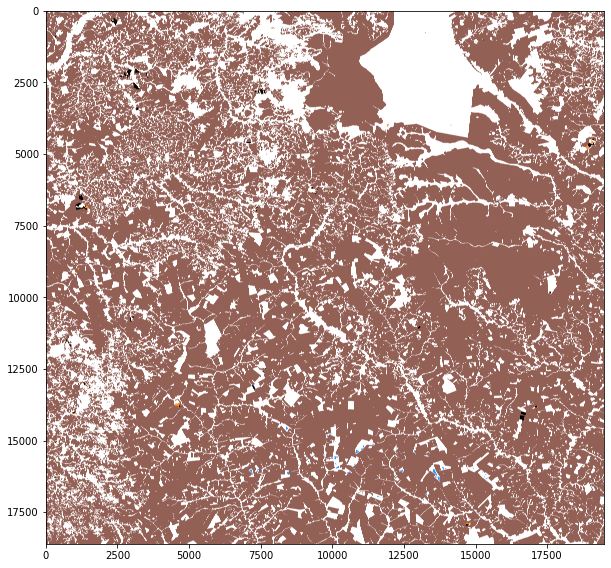

In [121]:
plt.figure(figsize=(10, 10))
plt.imshow(manager.error_mask_to_show_rgb[...,::-1])


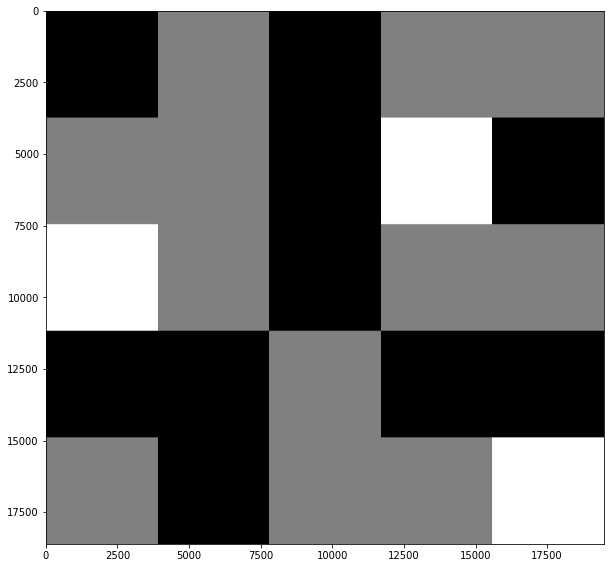

In [122]:
plt.figure(figsize=(10, 10))
plt.imshow(manager.mask_tr_val, cmap='gray')

In [123]:
manager.dataset.previewLims1 = np.array([230, 500, 2230, 2500])
manager.dataset.previewLims2 = np.array([12500, 15000, 15000, 17500])
manager.dataset.previewLims2 = np.array([4000, 5000, 18000, None])
manager.dataset.previewLims2 = np.array([3000, 7000, 16000, None])


# PI
manager.dataset.previewLims2 = np.array([5000, 7500, 12500, 15000])
manager.dataset.previewLims1 = np.array([17000, 18000, 5000, 7500])
manager.dataset.previewLims2 = np.array([5000, 7500, 10000, 12500])

# MA

manager.dataset.previewLims1 = np.array([17000, 18000, 6000, 7000])
manager.dataset.previewLims2 = np.array([12500, 15000, 2000, 3000])

# MS

manager.dataset.previewLims1 = np.array([15000, 17500, 5000, 7700])
manager.dataset.previewLims2 = np.array([12500, 15000, 2000, 3000])


In [124]:
lims = manager.dataset.previewLims1
ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
lims = manager.dataset.previewLims2
ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))


ic| 2731197965.py:2 in <cell line: 2>()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| 2731197965.py:4 in <cell line: 4>()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([0, 1], dtype=uint8), array([ 116000, 2384000], dtype=int64))


(array([0, 1], dtype=uint8), array([ 116000, 2384000], dtype=int64))

ic| Logger.py:279 in plotCropSampleT0T1()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| Logger.py:281 in plotCropSampleT0T1()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([0, 1], dtype=uint8), array([ 116000, 2384000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
ic| Logger.py:279 in plotCropSampleT0T1()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| Logger.py:281 in plotCropSampleT0T1()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([0, 1], dtype=uint8), array([ 116000, 2384000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
ic| Logger.py:279 in plotCropSampleT0T1()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1]

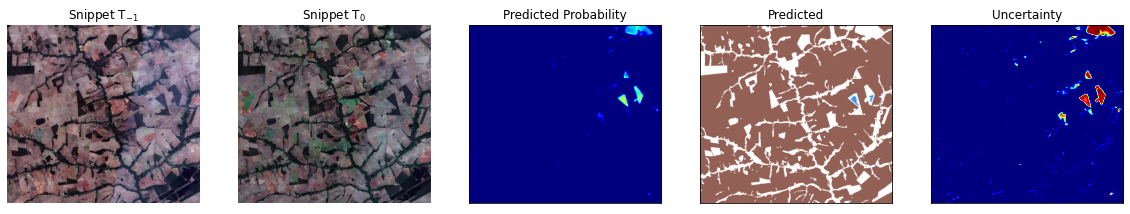

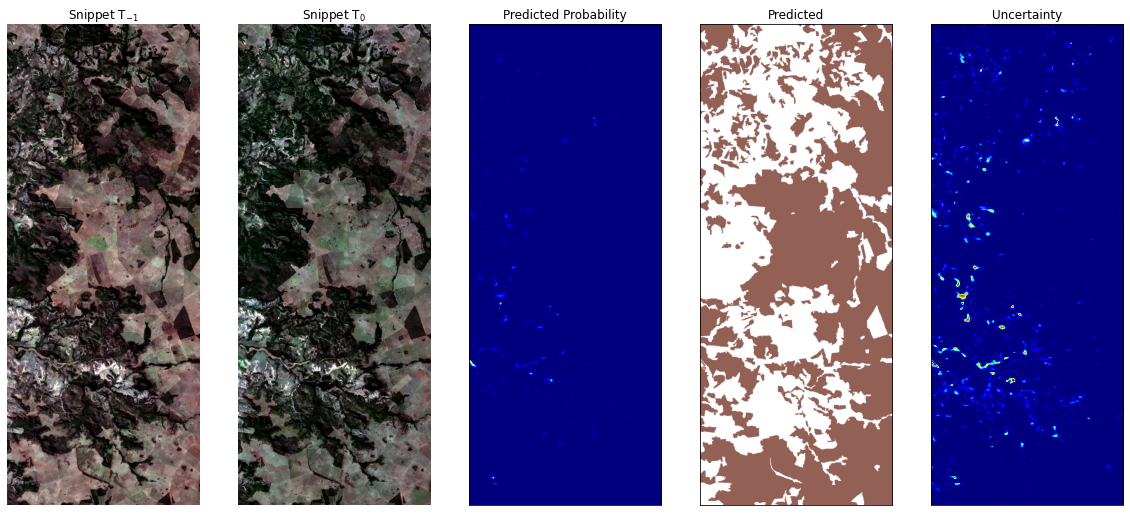

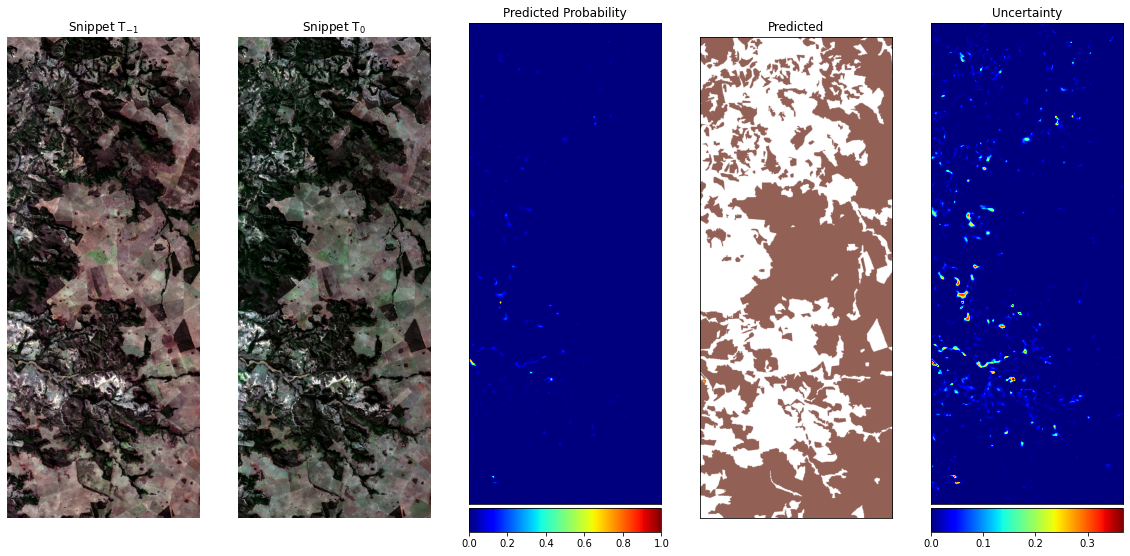

In [125]:
manager.logger.plotCropSampleT0T1(manager, manager.dataset.previewLims1, save_name='1')
manager.logger.plotCropSampleT0T1(manager, manager.dataset.previewLims2, save_name='2')
manager.logger.plotCropSampleT0T1(manager, manager.dataset.previewLims2, colorbar=True, save_name='Colorbar')

In [126]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:121 in getStats()
    np.min(value): -0.0
    np.mean(value): 0.015393929
    np.max(value): 0.36787948


In [127]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [128]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [129]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [130]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [131]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
            self.threshold_list = np.linspace(np.min(self.uncertainty) + 0.000015, np.max(self.uncertainty) - 0.0015, 19)
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [132]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)



Get precision-recall threshold

In [133]:

manager.getUncertaintyAAValues()

ic| 1409948429.py:63 in getUncertaintyAAValues()
    self.uncertainty.shape: (36863450,)
    self.label_mask_current_deforestation_test.shape: (36863450,)


[0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.3648794801235199, 0.3663794801235199]
threshold 0.0025


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (10257319,)
    predicted_test_classified_incorrect.shape: (10257319,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 10257319
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 10257319
    len(label_mask_current_deforestation_test): 36863450


[0.99482073 0.87300933 0.343858   0.27825174 0.88373796 0.72270973
 0.00635758]
threshold 0.005


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (7939732,)
    predicted_test_classified_incorrect.shape: (7939732,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 7939732
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 7939732
    len(label_mask_current_deforestation_test): 36863450


[0.99367747 0.87546021 0.37966905 0.21538223 0.87587577 0.71026937
 0.00804054]
threshold 0.0075


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (6704789,)
    predicted_test_classified_incorrect.shape: (6704789,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 6704789
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 6704789
    len(label_mask_current_deforestation_test): 36863450


[0.99315897 0.87698696 0.40288991 0.18188176 0.86998255 0.70111173
 0.00939356]
threshold 0.01


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (5928004,)
    predicted_test_classified_incorrect.shape: (5928004,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5928004
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5928004
    len(label_mask_current_deforestation_test): 36863450


[0.99276284 0.87787371 0.42098206 0.1608098  0.86495776 0.69348712
 0.0105055 ]
threshold 0.015


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4925475,)
    predicted_test_classified_incorrect.shape: (4925475,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4925475
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4925475
    len(label_mask_current_deforestation_test): 36863450


[0.99233608 0.8793213  0.44972559 0.13361405 0.8558581  0.67993266
 0.01242512]
threshold 0.025


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3817754,)
    predicted_test_classified_incorrect.shape: (3817754,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3817754
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3817754
    len(label_mask_current_deforestation_test): 36863450


[0.99178356 0.88129369 0.49016769 0.10356475 0.84051218 0.65735845
 0.01563796]
threshold 0.05


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2583686,)
    predicted_test_classified_incorrect.shape: (2583686,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2583686
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2583686
    len(label_mask_current_deforestation_test): 36863450


[0.99039097 0.87861617 0.54926871 0.07008801 0.81135646 0.62062639
 0.02178557]
threshold 0.08


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1945705,)
    predicted_test_classified_incorrect.shape: (1945705,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1945705
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1945705
    len(label_mask_current_deforestation_test): 36863450


[0.98830419 0.87343376 0.59312187 0.05278141 0.78274202 0.58824923
 0.02706979]
threshold 0.1


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1703507,)
    predicted_test_classified_incorrect.shape: (1703507,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1703507
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1703507
    len(label_mask_current_deforestation_test): 36863450


[0.98779378 0.87060855 0.61501217 0.04621127 0.76307556 0.56848227
 0.02981894]
threshold 0.15


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1308851,)
    predicted_test_classified_incorrect.shape: (1308851,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1308851
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1308851
    len(label_mask_current_deforestation_test): 36863450


[0.98666052 0.86323021 0.65874437 0.03550539 0.70915748 0.51993639
 0.0354204 ]
threshold 0.2


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1015421,)
    predicted_test_classified_incorrect.shape: (1015421,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1015421
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1015421
    len(label_mask_current_deforestation_test): 36863450


[0.9854891  0.85540741 0.69380201 0.02754547 0.6416652  0.46636788
 0.04125016]
threshold 0.225


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (853015,)
    predicted_test_classified_incorrect.shape: (853015,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 853015
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 853015
    len(label_mask_current_deforestation_test): 36863450


[0.9851204  0.84995452 0.71044956 0.02313986 0.59476485 0.43537859
 0.04583431]
threshold 0.25


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (707608,)
    predicted_test_classified_incorrect.shape: (707608,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 707608
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 707608
    len(label_mask_current_deforestation_test): 36863450


[0.9846236  0.84657265 0.72654068 0.01919538 0.53526444 0.39050846
 0.05195657]
threshold 0.27


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (617738,)
    predicted_test_classified_incorrect.shape: (617738,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 617738
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 617738
    len(label_mask_current_deforestation_test): 36863450


[0.98398361 0.84388572 0.73867124 0.01675747 0.47706387 0.34679565
 0.05641862]
threshold 0.3


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (485314,)
    predicted_test_classified_incorrect.shape: (485314,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 485314
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 485314
    len(label_mask_current_deforestation_test): 36863450


[0.98096003 0.83858228 0.75513907 0.01316518 0.37423906 0.26903306
 0.06395242]
threshold 0.34


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (289265,)
    predicted_test_classified_incorrect.shape: (289265,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 289265
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 289265
    len(label_mask_current_deforestation_test): 36863450


[0.94328194 0.82947228 0.77772056 0.00784693 0.24866639 0.06713566
 0.05873775]
threshold 0.36


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (146867,)
    predicted_test_classified_incorrect.shape: (146867,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:297: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 146867
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 146867
    len(label_mask_current_deforestation_test): 36863450


[0.92937479 0.80888299 0.78190923 0.00398408        nan 0.
 0.04435996]
threshold 0.3648794801235199


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (88687,)
    predicted_test_classified_incorrect.shape: (88687,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:297: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 88687
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 88687
    len(label_mask_current_deforestation_test): 36863450


[0.92937479 0.79804375 0.78190923 0.00240582        nan 0.
 0.03585987]
threshold 0.3663794801235199


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (60636,)
    predicted_test_classified_incorrect.shape: (60636,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:297: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 60636
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 60636
    len(label_mask_current_deforestation_test): 36863450


[0.92937479 0.79311167 0.78190923 0.00164488        nan 0.
 0.02986547]


In [134]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:682 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (36863450,)
    self.label_mask_current_deforestation_test.shape: (36863450,)


threshold 0.0025
(36863450,) (36863450,)
cm_audited [[36573580      518]
 [   14473   274879]]
[0.99811908 0.94998134]
threshold 0.005
(36863450,) (36863450,)
cm_audited [[36573399      699]
 [   15628   273724]]
[0.99745284 0.94598966]
threshold 0.0075
(36863450,) (36863450,)
cm_audited [[36573295      803]
 [   16352   273000]]
[0.99706723 0.94348752]
threshold 0.01
(36863450,) (36863450,)
cm_audited [[36573210      888]
 [   16946   272406]]
[0.99675075 0.94143465]
threshold 0.015
(36863450,) (36863450,)
cm_audited [[36573093     1005]
 [   17859   271493]]
[0.9963119  0.93827933]
threshold 0.025
(36863450,) (36863450,)
cm_audited [[36572923     1175]
 [   19104   270248]]
[0.99567096 0.93397661]
threshold 0.05
(36863450,) (36863450,)
cm_audited [[36572556     1542]
 [   21957   267395]]
[0.99426632 0.92411665]
threshold 0.08
(36863450,) (36863450,)
cm_audited [[36572067     2031]
 [   24869   264483]]
[0.99237939 0.91405278]
threshold 0.1
(36863450,) (36863450,)
cm_audited [[365718

ic| base.py:688 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[0.99811908, 0.94998134],
                                  [0.99745284, 0.94598966],
                                  [0.99706723, 0.94348752],
                                  [0.99675075, 0.94143465],
                                  [0.9963119 , 0.93827933],
                                  [0.99567096, 0.93397661],
                                  [0.99426632, 0.92411665],
                                  [0.99237939, 0.91405278],
                                  [0.99170511, 0.90859576],
                                  [0.99015394, 0.89562885],
                                  [0.98855922, 0.88272416],
                                  [0.987879  , 0.87458182],
                                  [0.98710197, 0.86832647],
                                  [0.98626481, 0.86334983],
                                  [0.98313946, 0.85464417],
                                  [0.94727203, 0.

cm_audited [[36556905    17193]
 [   59018   230334]]
[0.93054091 0.7960339 ]


In [135]:
manager.setPlotLimsForUncertaintyAA()

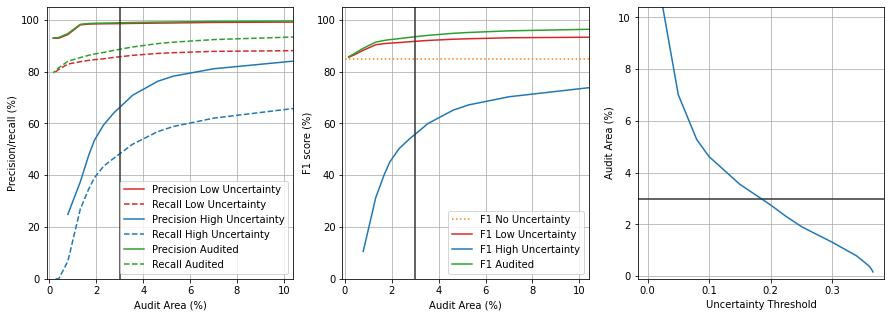

In [136]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [137]:
from scipy import optimize  


In [138]:
manager.getOptimalUncertaintyThreshold(bounds=(np.min(manager.uncertainty) + 0.000015, np.max(manager.uncertainty) - 0.0015))

ic| base.py:791 in getOptimalUncertaintyThreshold()
    bounds: (1.5e-05, 0.3663794801235199)


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.13995377913649928
threshold 0.13995377913649928


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1375160,)
    predicted_test_classified_incorrect.shape: (1375160,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1375160
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1375160
    len(label_mask_current_deforestation_test): 36863450


[0.98696707 0.86470027 0.65115499 0.03730416 0.72011268 0.52945786
 0.03434582]
0.22644070098702052
threshold 0.22644070098702052


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (842964,)
    predicted_test_classified_incorrect.shape: (842964,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 842964
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 842964
    len(label_mask_current_deforestation_test): 36863450


[0.98508962 0.84974491 0.71147253 0.0228672  0.59147368 0.43286467
 0.04621057]
0.27989255827299864
threshold 0.27989255827299864


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (575192,)
    predicted_test_classified_incorrect.shape: (575192,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 575192
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 575192
    len(label_mask_current_deforestation_test): 36863450


[0.98344862 0.84221269 0.74438746 0.01560331 0.44450358 0.32303847
 0.05865917]
0.18420273492068992
threshold 0.18420273492068992


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1106507,)
    predicted_test_classified_incorrect.shape: (1106507,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1106507
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1106507
    len(label_mask_current_deforestation_test): 36863450


[0.98579476 0.85807228 0.68280848 0.03001637 0.66653495 0.48518638
 0.03920377]
0.18345439868202323
threshold 0.18345439868202323


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1110716,)
    predicted_test_classified_incorrect.shape: (1110716,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1110716
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1110716
    len(label_mask_current_deforestation_test): 36863450


[0.98581436 0.85820224 0.68232464 0.03013055 0.6675238  0.48592725
 0.03911783]
0.19404266327745198
threshold 0.19404266327745198


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1050330,)
    predicted_test_classified_incorrect.shape: (1050330,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1050330
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1050330
    len(label_mask_current_deforestation_test): 36863450


[0.98564147 0.85645309 0.6896479  0.02849245 0.65140794 0.47371129
 0.04043958]
0.18796125310610912
threshold 0.18796125310610912


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1085126,)
    predicted_test_classified_incorrect.shape: (1085126,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1085126
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1085126
    len(label_mask_current_deforestation_test): 36863450


[0.98573466 0.85748691 0.6853832  0.02943637 0.66101815 0.48092983
 0.03966971]
0.18498161710760572
threshold 0.18498161710760572


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1102005,)
    predicted_test_classified_incorrect.shape: (1102005,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1102005
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1102005
    len(label_mask_current_deforestation_test): 36863450


[0.98579099 0.85792945 0.68334416 0.02989424 0.66537573 0.48435855
 0.03929771]
0.18426438077168159
threshold 0.18426438077168159


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1106160,)
    predicted_test_classified_incorrect.shape: (1106160,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1106160
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1106160
    len(label_mask_current_deforestation_test): 36863450


[0.98579055 0.85805608 0.68284304 0.03000696 0.66647291 0.48514851
 0.03920931]
0.18443830114005802
threshold 0.18443830114005802


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1105118,)
    predicted_test_classified_incorrect.shape: (1105118,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105118
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105118
    len(label_mask_current_deforestation_test): 36863450


[0.98579303 0.85801432 0.682964   0.02997869 0.66620128 0.48498298
 0.03922964]
0.18433081244106547
threshold 0.18433081244106547


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1105747,)
    predicted_test_classified_incorrect.shape: (1105747,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105747
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105747
    len(label_mask_current_deforestation_test): 36863450


[0.98579126 0.85804734 0.6828776  0.02999575 0.66639535 0.48509421
 0.03921986]
0.18436414850846658
threshold 0.18436414850846658


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1105552,)
    predicted_test_classified_incorrect.shape: (1105552,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105552
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105552
    len(label_mask_current_deforestation_test): 36863450
ic| base.py:795 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.18433081244106547


[0.98579168 0.85803241 0.68289834 0.02999046 0.66634879 0.48508297
 0.03922201]


In [139]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold:  0.18433081244106547
threshold 0.18433081244106547


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1105747,)
    predicted_test_classified_incorrect.shape: (1105747,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105747
    len(label_mask_current_deforestation_test): 36863450
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1105747
    len(label_mask_current_deforestation_test): 36863450


[0.98579126 0.85804734 0.6828776  0.02999575 0.66639535 0.48509421
 0.03921986]
threshold 0.18433081244106547
(36863450,) (36863450,)


ic| base.py:826 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.02999575]),
                     'UEO': array([0.03921986]),
                     'f1': 84.93,
                     'f1_H': array([0.56147192]),
                     'f1_L': array([0.91749416]),
                     'precision_H': array([0.66639535]),
                     'precision_L': array([0.98579126]),
                     'recall_H': array([0.48509421]),
                     'recall_L': array([0.85804734]),
                     'recall_Ltotal': array([0.6828776])}
ic| base.py:827 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.93525342]),
                             'precision': array([0.98902551]),
                             'recall': array([0.88702687])}


cm_audited [[36571250     2848]
 [   32689   256663]]
[0.98902551 0.88702687]


{'metrics': {'precision_L': array([0.98579126]),
  'recall_L': array([0.85804734]),
  'recall_Ltotal': array([0.6828776]),
  'AA': array([0.02999575]),
  'precision_H': array([0.66639535]),
  'recall_H': array([0.48509421]),
  'UEO': array([0.03921986]),
  'f1_L': array([0.91749416]),
  'f1_H': array([0.56147192]),
  'f1': 84.93},
 'metrics_audited': {'precision': array([0.98902551]),
  'recall': array([0.88702687]),
  'f1': array([0.93525342])},
 'exp': 30}

In [148]:
manager.dataset.paths.im_filenames[2019][0]
manager.dataset.paths.optical_im_past_dates[2019]

'D:/Jorge/datasets/sentinel2/MS/2019'

In [149]:
import utils_v1
import rasterio
georreferenced_save = True
if georreferenced_save == True:
    # georref_im = utils_v1.load_tiff_image('D:/Jorge/datasets/sentinel2/MT_2019/S2_R1_MT_2019_08_02_2019_08_05_B3_B4.tif')
    path = os.path.join(manager.dataset.paths.optical_im_past_dates[2019], 
        manager.dataset.paths.im_filenames[2019][0])
    print("path",path)
    georref_im = utils_v1.load_tiff_image(path)





path D:/Jorge/datasets/sentinel2/MS/2019\S2_MS_B4_B3_2019_crop.tif
D:/Jorge/datasets/sentinel2/MS/2019\S2_MS_B4_B3_2019_crop.tif


In [151]:
if georreferenced_save == True:
    print(georref_im.shape)

(2, 18605, 19481)
